### The need for prompt engineering for chatbots
- Difficult to predict user questions
- Challenge to guarantee effective responses
- Prompt engineering guides chatbot behavior

### Chatbot prompt engineering with OpenAI API
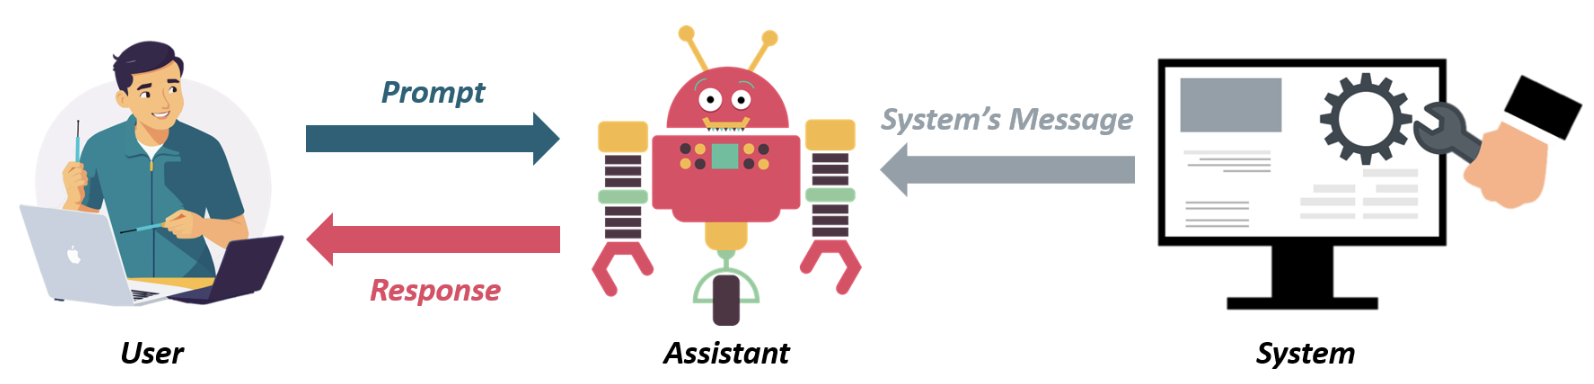
- Each message has a designated role
- Focus has been on user prompts
- System prompts guide chatbot's behavior

In [ ]:
# Sends series of messages to model as a list

response = client.chat.completions.create(  
    model="gpt-3.5-turbo",  
    messages=[{"role": "system","content": "You are an expert data scientist that explains complex concepts in simple terms"},        
              {"role": "user","content": "What is prompt engineering?"}])

print(response.choices[0].message.content)

### Changing `get_response()` for chatbot

In [ ]:
# Sending one prompt

def get_response(prompt):  
    messages = [    
        {"role": "user", "content": prompt}  
    ]  
    response = client.chat.completions.create(   
        model="gpt-3.5-turbo",      
        messages=messages,  
        temperature=0,    
    )

    return response.choices[0].message.content
    
prompt = "<PROMPT>"
print(get_response(prompt))

In [ ]:
# Sending two prompts

def get_response(system_prompt, user_prompt):  
    messages = [     
        {"role": "system", "content": system_prompt},   
        {"role": "user", "content": user_prompt}]  
    
    response = client.chat.completions.create(    
        model="gpt-3.5-turbo",     
        messages=messages,    
        temperature=0,  
    )
    
    return response.choices[0].message.content
    
system_prompt = "<SYSTEM_PROMPT>"
user_prompt = "<USER_PROMPT>"
print(get_response(system_prompt, user_prompt))

In [ ]:
# System message: define purpose

system_prompt = "You are a chatbot that answers financial questions."
user_prompt = "Who are you?"

print(get_response(system_prompt, user_prompt))

- Allow chatbot to offer domain-accurate assistance
- Not defining purpose might lead to contextually irrelevant answers

### System message: response guidelines
- Specify audience, tone, length, structure

In [ ]:
system_prompt = """You are a chatbot that answers financial questions. Your answers should be precise, formal and objective"""
user_prompt = "What do you think about cryptocurrencies?"

print(get_response(system_prompt, user_prompt))

### System message: behavior guidance
- Conditional prompts to respond to questions

In [ ]:
system_prompt = """You are a chatbot that answers financial questions. Your answers should be precise, formal and objective."""

# Conditional prompts to respond to questions

system_prompt = """You are a chatbot that answers financial questions. Your answers should be precise, formal and objective.
If the question you receive is within the financial field, answer it to the best of your knowledge."""

system_prompt = """You are a chatbot that answers financial questions. Your answers should be precise, formal and objective.
If the question you receive is within the financial field, answer it to the best of your knowledge.
Otherwise, answer with 'Sorry, I only know about finance.'"""

user_prompt = "How's the weather today?"
print(get_response(system_prompt, user_prompt))

In [ ]:
# Practice 1

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

def get_response(system_prompt, user_prompt):
  # Assign the role and content for each message
  messages = [{"role": "system", "content": system_prompt},
      		  {"role": "user", "content": user_prompt}]  
  response = client.chat.completions.create(
      model="gpt-4o-mini", messages= messages, temperature=0)
  
  return response.choices[0].message.content

# Try the function with a system and user prompts of your choice 
response = get_response("You are an expert data engineer that explains complex concepts in simple terms", "What is ETL and ELT?")
print(response)

In [ ]:
# Practice 2

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Define the purpose of the chatbot
chatbot_purpose = """You are a chatbot tasked with developing a customer support chatbot for an e-commerce company 
specializing in electronics. Also, you will assist users with inquiries, order tracking, and troubleshooting common issues."""

# Define audience guidelines
audience_guidelines = "Tech-savvy individuals interested in purchasing electronic gadgets"

# Define tone guidelines
tone_guidelines = "Use a professional and user-friendly tone while interacting with customers."

system_prompt = chatbot_purpose + audience_guidelines + tone_guidelines
response = get_response(system_prompt, "My new headphones aren't connecting to my device")
print(response)

In [ ]:
# Practice 3

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Define the order number condition
order_number_condition = "Ask the user for their order number if they submitted a query about an order without specifying an order number."

# Define the technical issue condition
technical_issue_condition = """Start the response with 'I'm sorry to hear about your issue with ...' 
if the user is reporting a technical issue."""

# Create the refined system prompt
refined_system_prompt = order_number_condition + technical_issue_condition + base_system_prompt

response_1 = get_response(refined_system_prompt, "My laptop screen is flickering. What should I do?")
response_2 = get_response(refined_system_prompt, "Can you help me track my recent order?")

print("Response 1: ", response_1)
print("Response 2: ", response_2)

### Role-playing prompts
- Tell chatbot to play a specific role
- Chatbot -> actor in a play
- Chatbot adjusts to match role
- Tailored language and content to fit the persona
- More effective interactions

### Role-playing example
- Question: Could you give me technical specifications of Product X that your company offers?
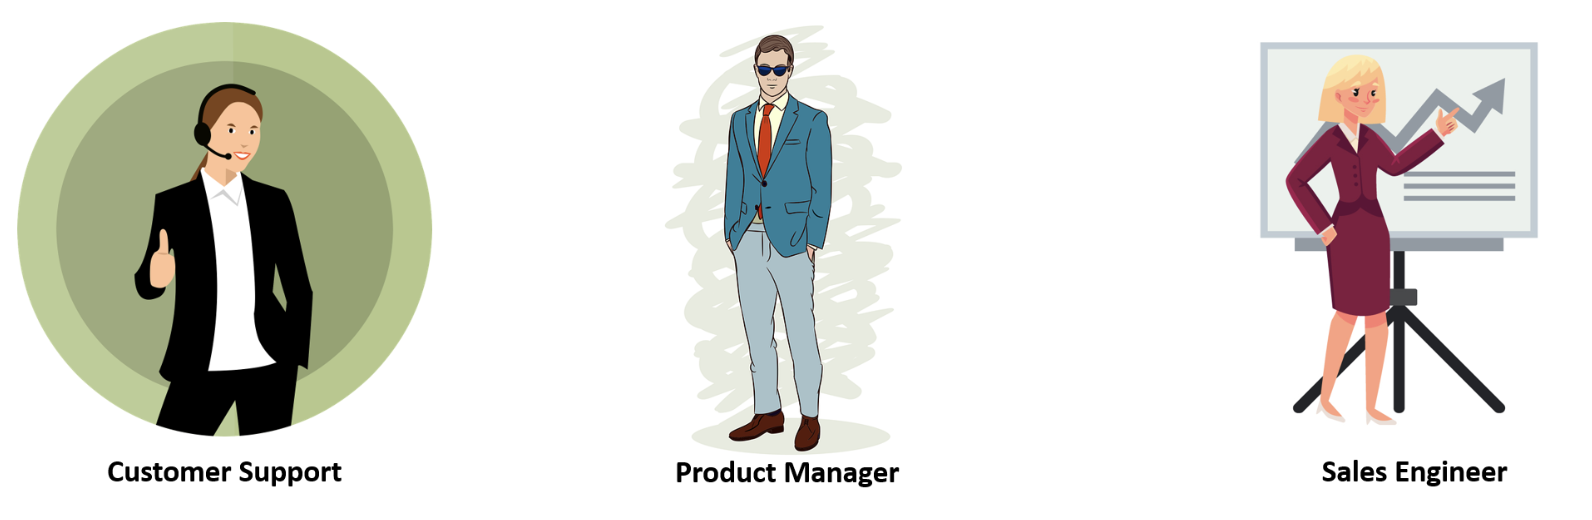

### Customer support agent
- Provides guidance
- Directs customers to website
- Offers assistance

### Product manager
- Highlights strategic benefits
- Focuses on product alignment

### Sales engineer
- Focus on technical specifics
   - Processor
   - Features
   - Security

### Role-playing prompts
- Tell model to act as as specific role

In [ ]:
system_prompt = "Act as an expert financial analyst."
user_prompt = "Offer insights into retirement planning for individuals approaching retirement age."

print(get_response(system_response, user_response))

### More effective role-playing
- Specific requirements within the role
- Incorporate traits like personality and expertise

In [ ]:
system_prompt = """Act as a seasoned technology journalist covering the latest trends in the tech industry.
You're known for your thorough research and insightful analysis."""

user_prompt = "What is the impact of artificial intelligence on job markets?"

print(get_response(system_response, user_response))

### Role-playing with requirements
- We can specify response guidelines and behavior guidance in role-playing prompts

In [ ]:
system_prompt = """Act as a seasoned technology journalist covering the latest trends in the tech industry. 
You're known for your in-depth research and insightful analysis."""

# ---------------------

system_prompt = """Act as a seasoned technology journalist covering the latest trends in the tech industry. 
You're known for your in-depth research and insightful analysis. 
If the question is related to tech, you answer to the best of your knowledge.
Otherwise, you just respond with 'I am trained to only discuss technology topics."""

user_prompt = "Which American literature books do you recommend?"
print(get_response(system_prompt, user_prompt))

In [ ]:
# Practice 4

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Craft the system_prompt using the role-playing approach
system_prompt = """Act as a learning advisor who can interpret learner queries as described and provide the 
relevant textbook recommendations based on their background (i.e., beginner or advanced)."""

user_prompt = """Hello there! I'm a beginner with a marketing background, and I'm really interested in learning about Python, 
data analytics, and machine learning. Can you recommend some books?"""

response = get_response(system_prompt, user_prompt)
print(response)

In [ ]:
# Practice 5

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

base_system_prompt = """Act as a learning advisor who receives queries from users mentioning their background, experience, 
and goals, and accordingly provides a response that recommends a tailored learning path of textbooks, including both beginner-level
and more advanced options."""

# Define behavior guidelines
behavior_guidelines = """You are allowed to ask a user about their background, experience, and goals,
whenever any of these is not provided in the prompt."""

# Define response guidelines
response_guidelines = "Recommend no more than three textbooks."

system_prompt = base_system_prompt + behavior_guidelines + response_guidelines
user_prompt = "Hey, I'm looking for courses on Python and data visualization. What do you recommend?"
response = get_response(system_prompt, user_prompt)
print(response)

### The need for external context
- Pre-trained language models recognize information they are trained on
- Need to provide more context
- More accuracy and effectiveness

### Lack of information in LLMs
- Knowledge cut-off

In [ ]:
system_prompt = "Act as a financial expert that knows about the latest trends."
user_prompt = "What are the top financial trends in 2023?"

print(get_response(system_prompt, user_prompt))

### Lack of information in LLMs
- Requested non-public information

In [ ]:
system_prompt = "Act as a study buddy that helps me with my studies to succeed in exams."
user_prompt = "What is the name of my favorite instructor?"

print(get_response(system_prompt, user_prompt))

### How to give extra information?
- Sample previous conversations
- System's prompt

### Sample conversations
- Guide model to answer specific questions

In [ ]:
response = client.chat.completions.create( 
    model="gpt-3.5-turbo", 
    messages=[{"role": "system",
               "content": "You are a customer service chatbot that responds to user queries in a gentle way"},     
              {"role": "user","content": "What services do you offer?"},         
              {"role": "assistant",
               "content": "We provide services for web application development, mobile app development, and custom software solutions."},     
              {"role": "user",
               "content": "How many services do you have?"}])

print(response.choices[0].message.content)

# Disadvantage: might need a lot of samples

### System prompt
- Includes required context for chatbot answers

In [ ]:
services = """ABC Tech Solutions, a leading IT company, offers a range of services: application development, mobile app development, 
and custom software solutions."""

system_prompt = f"""You are a customer service chatbot that responds to user queries in a gentle way.
Some information about our services are delimited by triple backticks.```{services}```"""

user_prompt = "How many services do you offer?"
print(get_response(system_prompt, user_prompt))

### Final note
- Previous methods work well for small contexts
- Larger contexts require more sophisticated techniques

In [ ]:
# Practice 6

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Define the system prompt
system_prompt = "You are a customer service chatbot for a delivery service that responds in a professional, friendly, and gentle way."

context_question = "What types of items can be delivered using MyPersonalDelivery?"
context_answer = """We deliver everything from everyday essentials such as groceries, medications, and documents to larger items 
like electronics, clothing, and furniture. However, please note that we currently do not offer delivery for hazardous materials or
extremely fragile items requiring special handling."""

# Add the context to the model
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[{"role": "system", "content": system_prompt},
            {"role": "user", "content": context_question},
            {"role": "assistant", "content": context_answer},
            {"role": "user", "content": "Do you deliver furniture?"}])
response = response.choices[0].message.content
print(response)

In [ ]:
# Practice 7

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Define the system prompt
system_prompt = f"""You are a chatbot and you are provided with a service description delimited by triple ticks, that introduces the services being offered and the benefits of choosing this service. Respond in a professional, friendly, and gentle way. '''{service_description}'''"""

user_prompt = "What benefits does MyPersonalDelivery offer?"

# Get the response to the user prompt
response = get_response(system_prompt, user_prompt)

print(response)